# DSA - Formação Cientista de Dados - Módulo de Machine Learning

# Projeto 8: Modelagem Preditiva em IoT, Previsão de Uso de Energia

Igor Moro Lima, São Paulo, SP, out/2024

In [3]:
# Importação de bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

c:\Users\igor_\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\igor_\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
# Carrega o dataset
df_treino = pd.read_csv("projeto8-data_files/projeto8-training.csv")
df_teste = pd.read_csv("projeto8-data_files/projeto8-testing.csv")

In [83]:
# Visualiza as primeiras linhas
df_treino.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [5]:
# Visualiza as primeiras linhas
df_teste.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [84]:
# Tamanho dos dados de treino e teste fornecidos, percebe-se que os testes representam 25% do total, e treino 75%, portanto está ok
print(len(df_teste))
print(len(df_treino))
print('Os dados de teste representam', round((len(df_teste) / (len(df_treino) + len(df_teste))), 3) * 100, '%', 'do total')

4932
14803
Os dados de teste representam 25.0 % do total


In [6]:
# Aplicando One Hot Encoding para variáveis preditoras categóricas
df_treino = pd.get_dummies(df_treino, columns=['WeekStatus', 'Day_of_week'])

In [7]:
df_treino.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,61200,True,False,False,True,False,False,False,False,False
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,61800,True,False,False,True,False,False,False,False,False
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,62400,True,False,False,True,False,False,False,False,False
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,63600,True,False,False,True,False,False,False,False,False
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,64200,True,False,False,True,False,False,False,False,False


In [8]:
# Eliminando colunas categóricas
df_teste = df_teste.drop(['date'], axis=1)
df_treino = df_treino.drop(['date'], axis=1)

In [9]:
# Resumo estatístico
df_treino.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
count,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,...,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000
mean,98.011214,3.802608,21.684167,40.271439,20.342506,40.418056,22.262628,39.249149,20.855433,39.030359,...,41.542065,7.413018,755.502983,79.734122,4.034470,38.330141,3.756859,25.078087,25.078087,42985.989326
std,102.828019,7.940340,1.607780,3.981741,2.191842,4.066223,2.013785,3.252755,2.044786,4.339783,...,4.150839,5.323843,7.427684,14.955609,2.436870,11.812780,4.200297,14.481537,14.481537,24968.649028
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.893333,17.200000,28.766667,15.100000,27.660000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000
25%,50.000000,0.000000,20.730000,37.361667,18.823333,37.900000,20.790000,36.900000,19.500000,35.530000,...,38.500000,3.666667,750.866667,70.000000,2.000000,29.000000,0.900000,12.580425,12.580425,21600.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,40.863333,6.900000,756.100000,83.666667,3.666667,40.000000,3.450000,25.043993,25.043993,43200.000000
75%,100.000000,0.000000,22.600000,43.090000,21.500000,43.290000,23.290000,41.761667,22.100000,42.130000,...,44.363333,10.400000,760.933333,91.666667,5.500000,40.000000,6.533333,37.665907,37.665907,64800.000000
max,1080.000000,50.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.063333,...,53.326667,25.966667,772.300000,100.000000,13.500000,66.000000,15.500000,49.996530,49.996530,85800.000000


In [90]:
# Verificar valores ausentes em cada coluna
valores_ausentes = df_treino.isnull().sum()

# Mostrar apenas as colunas com valores ausentes
valores_ausentes[valores_ausentes > 0]

Series([], dtype: int64)

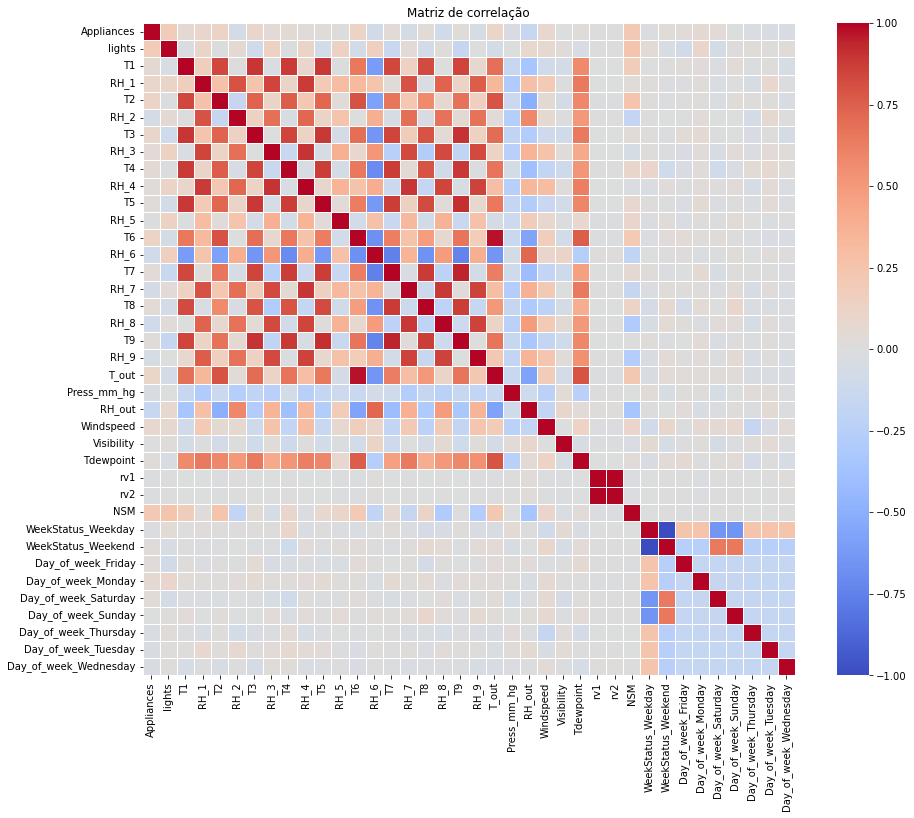

In [91]:
# Calcular a matriz de correlação
corr = df_treino.corr()

# Plotar o gráfico de calor (heatmap) sem os valores nas células
plt.figure(figsize=(15, 12))  # Definindo o tamanho do gráfico
plt.title('Matriz de correlação')
sns.heatmap(corr, cmap='coolwarm', square=True, linewidths=0.5)

plt.show()

Verifica-se baixa correlação da variável alvo (Appliances) com todas as outras variáveis preditoras, o que não necessariamente é um problema, mas pode indicar que o modelo pode não ter bons resultados preditivos. Ainda será necessário verificar erros médios e R² para entender mais sobre a eficácia do modelo gerado

Além disso há alta correlação entre rv1 e rv2, assim como Weekday e Weekend, o que pode gerar problema de multicolinearidade, porém como veremos mais a frente, não utilizarei estas variáveis por terem tido baixa importância como variáveis preditoras

In [92]:
# Divisão de variável variáveis preditoras e variável alvo (Appliances, que estou supondo aqui ser a energia gasta em eletrodomésticos)
X_train = df_treino.drop("Appliances", axis=1)  # Remove a coluna alvo do dataframe para predição
y_train = df_treino["Appliances"]  # Coluna alvo

X_test = df_teste.drop("Appliances", axis=1)
y_test = df_teste["Appliances"]

In [93]:
# Instanciar o modelo
rf = RandomForestRegressor(random_state=42)

# Ajustar o modelo aos dados
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [94]:
# Extrair a importância das variáveis preditoras
importancias = rf.feature_importances_

# Criar um DataFrame para visualizar as importâncias
importancia_variaveis = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': importancias
})

# Ordenar as variáveis por importância (do mais importante ao menos importante)
importancia_variaveis = importancia_variaveis.sort_values(by='Importância', ascending=False)

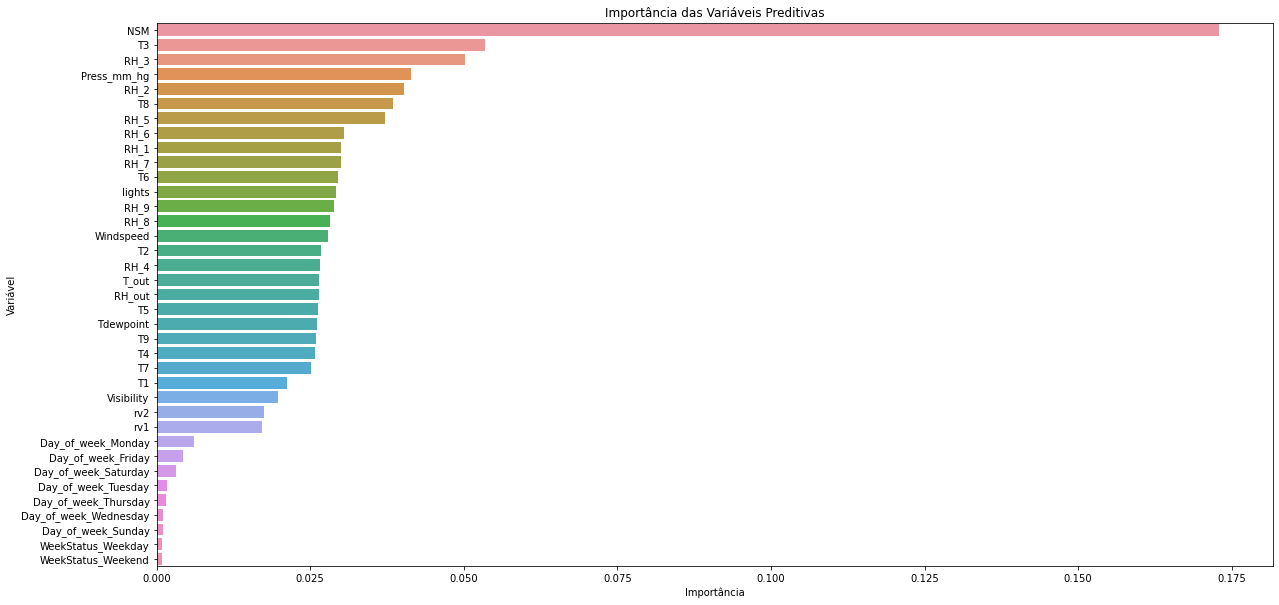

In [95]:
# Plotar as importâncias
plt.figure(figsize=(20, 10))
sns.barplot(x='Importância', y='Variável', data=importancia_variaveis)
plt.title('Importância das Variáveis Preditivas')
plt.show()

# 1ª Tentativa de modelo

Obs: De acordo com a literatura, não é estritamente necessário realizar a padronização dos dados antes de aplicar o GradientBoostingRegressor. Este algoritmo é baseado em árvores de decisão, e modelos de árvores, como o Gradient Boosting, geralmente não são sensíveis à escala das variáveis. Isso significa que a padronização ou normalização das variáveis não é essencial para melhorar a performance do modelo.

In [11]:
# Seleção de colunas mais relevantes para a regressão de acordo com a seleção de atributos anterior (maiores importâncias)
df_teste2 = df_teste[['Appliances','NSM','T3', 'T8', 'RH_2', 'RH_3', 'RH_5', 'Press_mm_hg']]
df_treino2 = df_treino[['Appliances','NSM','T3', 'T8', 'RH_2', 'RH_3', 'RH_5', 'Press_mm_hg']]

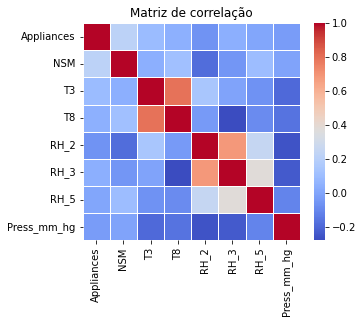

In [97]:
# Calcular a matriz de correlação
corr = df_treino2.corr()

# Plotar o gráfico de calor (heatmap) sem os valores nas células
plt.figure(figsize=(5, 4))  # Definindo o tamanho do gráfico
plt.title('Matriz de correlação')
sns.heatmap(corr, cmap='coolwarm', square=True, linewidths=0.5)

plt.show()

Boxplots para identificação de outliers

Index(['Appliances', 'NSM', 'T3', 'T8', 'RH_2', 'RH_3', 'RH_5', 'Press_mm_hg'], dtype='object')


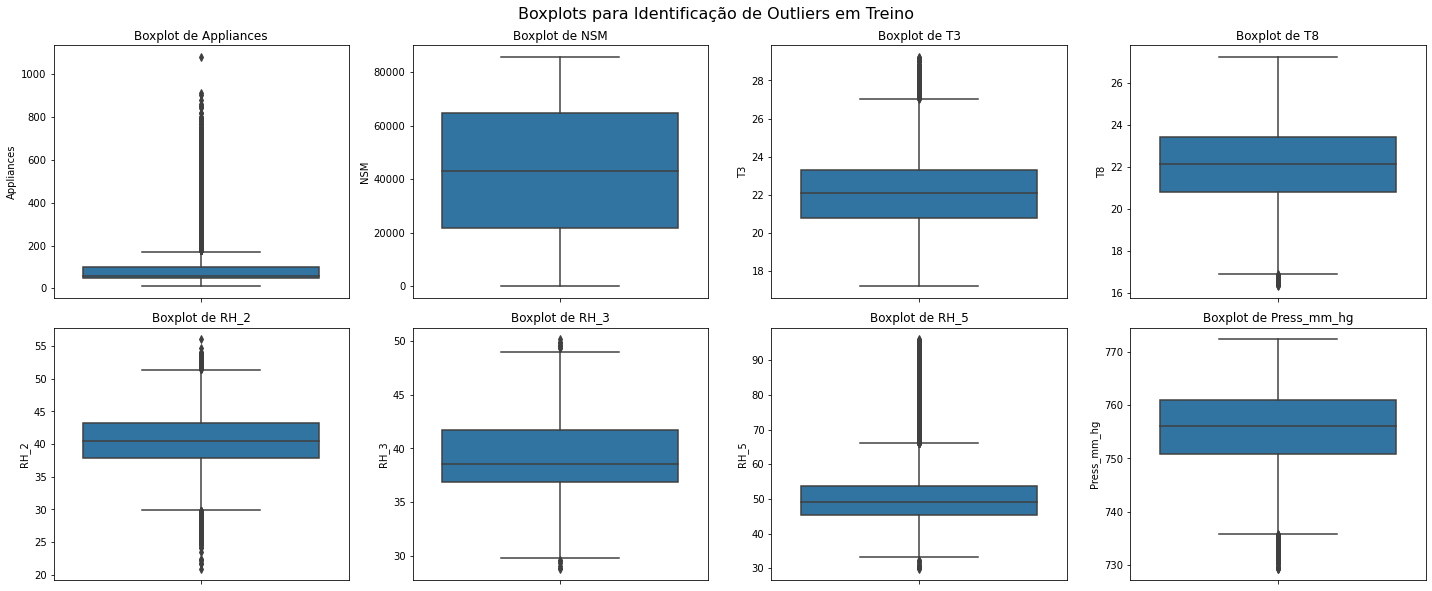

In [12]:
# Boxplots para identificação de outliers em treino

# Verificar colunas
print(df_treino2.columns)

# Define o tamanho do gráfico
plt.figure(figsize=(20, 8))

# Loop por todas as colunas do dataframe df_treino2
for i, coluna in enumerate(df_treino2.columns, 1):
    plt.subplot((len(df_treino2.columns) + 3) // 4, 4, i)  # Organiza os subplots para caber até 4 boxplots por linha
    sns.boxplot(y=df_treino2[coluna])  # Adicionar "y=" para evitar confusão
    plt.title(f'Boxplot de {coluna}')
    plt.tight_layout()

plt.suptitle('Boxplots para Identificação de Outliers em Treino', fontsize=16, y=1.02)

plt.show()

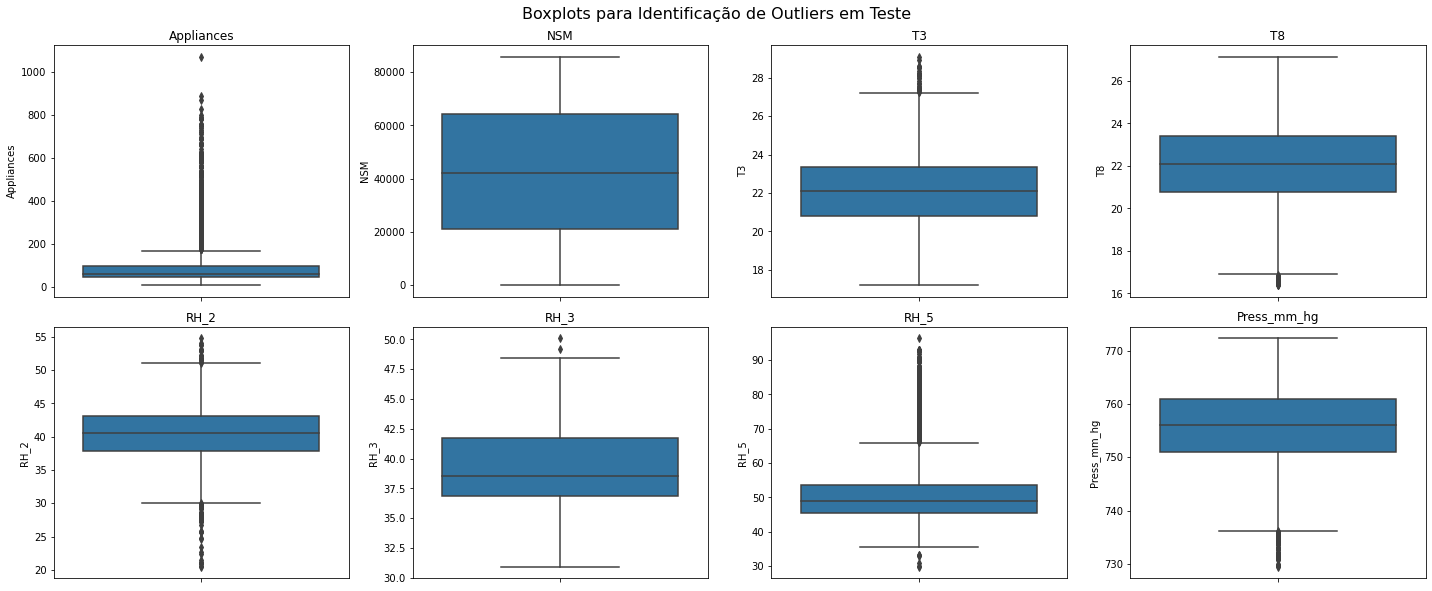

In [99]:
# Boxplots para identificação de outliers em teste

# Define o tamanho do gráfico
plt.figure(figsize=(20, 8))

# Loop por todas as colunas do dataframe df_treino2
for i, coluna in enumerate(df_treino2.columns, 1):
    plt.subplot((len(df_teste2.columns) + 3) // 4, 4, i)  # Organiza os subplots para caber até 4 boxplots por linha
    sns.boxplot(y=df_teste2[coluna])
    plt.title(f'{coluna}')
    plt.tight_layout()

plt.suptitle('Boxplots para Identificação de Outliers em Teste', fontsize=16, y=1.02)

plt.show()

Verifica-se a presença de outliers na maior parte das variáveis, portanto optou-se pela remoção de outliers pelo método do IQR (Interquartile Range ou Amplitude Interquartil), para algumas variáveis optou-se pela remoção superior e outro pela remoção inferior, devido à análise visual dos boxplots

O IQR é a diferença entre os quartis Q3 e Q1, e identificamos os outliers como pontos abaixo de Q1 - 1,5*IQR e acima de Q3 + 1,5*IQR



In [13]:
# Remoção de outliers superiores para treino

# Selecionar as variáveis das quais irei remover os outliers
variaveis_selecionadas = ['Appliances', 'T3', 'RH_2', 'RH_5']

# Iterar sobre cada variável selecionada e remover os outliers
for var in variaveis_selecionadas:
    # Calcular o primeiro e terceiro quartil (Q1 e Q3)
    Q1 = df_treino2[var].quantile(0.25)
    Q3 = df_treino2[var].quantile(0.75)
    
    # Calcular o IQR
    IQR = Q3 - Q1
    
    # Definir os limites inferior e superior para os outliers
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrar as linhas que estão dentro dos limites (removendo os outliers)
    df_treino2 = df_treino2[(df_treino2[var] <= limite_superior)]

# Exibir o dataframe sem os outliers
df_treino2.shape

(12221, 8)

In [101]:
# Remoção de outliers superiores para teste

# Selecionar as variáveis das quais irei remover os outliers
variaveis_selecionadas = ['Appliances', 'T3', 'RH_2', 'RH_5']

# Iterar sobre cada variável selecionada e remover os outliers
for var in variaveis_selecionadas:
    # Calcular o primeiro e terceiro quartil (Q1 e Q3)
    Q1 = df_teste2[var].quantile(0.25)
    Q3 = df_teste2[var].quantile(0.75)
    
    # Calcular o IQR
    IQR = Q3 - Q1
    
    # Definir os limites inferior e superior para os outliers
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrar as linhas que estão dentro dos limites (removendo os outliers)
    df_teste2 = df_teste2[(df_teste2[var] <= limite_superior)]

# Exibir o dataframe sem os outliers
df_teste2.shape

(4116, 8)

In [14]:
# Remoção de outliers inferiores para treino

# Selecionar as variáveis das quais irei remover os outliers
variaveis_selecionadas = ['RH_2', 'Press_mm_hg']

# Iterar sobre cada variável selecionada e remover os outliers
for var in variaveis_selecionadas:
    # Calcular o primeiro e terceiro quartil (Q1 e Q3)
    Q1 = df_treino2[var].quantile(0.25)
    Q3 = df_treino2[var].quantile(0.75)
    
    # Calcular o IQR
    IQR = Q3 - Q1
    
    # Definir os limites inferior e superior para os outliers
    limite_inferior = Q1 - 1.5 * IQR
    
    # Filtrar as linhas que estão dentro dos limites (removendo os outliers)
    df_treino2 = df_treino2[(df_treino2[var] >= limite_inferior)]

# Exibir o dataframe sem os outliers
df_treino2.shape

(11979, 8)

In [103]:
# Remoção de outliers inferiores para teste

# Selecionar as variáveis das quais irei remover os outliers
variaveis_selecionadas = ['RH_2', 'Press_mm_hg']

# Iterar sobre cada variável selecionada e remover os outliers
for var in variaveis_selecionadas:
    # Calcular o primeiro e terceiro quartil (Q1 e Q3)
    Q1 = df_teste2[var].quantile(0.25)
    Q3 = df_teste2[var].quantile(0.75)
    
    # Calcular o IQR
    IQR = Q3 - Q1
    
    # Definir os limites inferior e superior para os outliers
    limite_inferior = Q1 - 1.5 * IQR
    
    # Filtrar as linhas que estão dentro dos limites (removendo os outliers)
    df_teste2 = df_teste2[(df_teste2[var] >= limite_inferior)]

# Exibir o dataframe sem os outliers
df_teste2.shape

(4032, 8)

Boxplots após remoção de outliers em treino e teste

Index(['Appliances', 'NSM', 'T3', 'T8', 'RH_2', 'RH_3', 'RH_5', 'Press_mm_hg'], dtype='object')


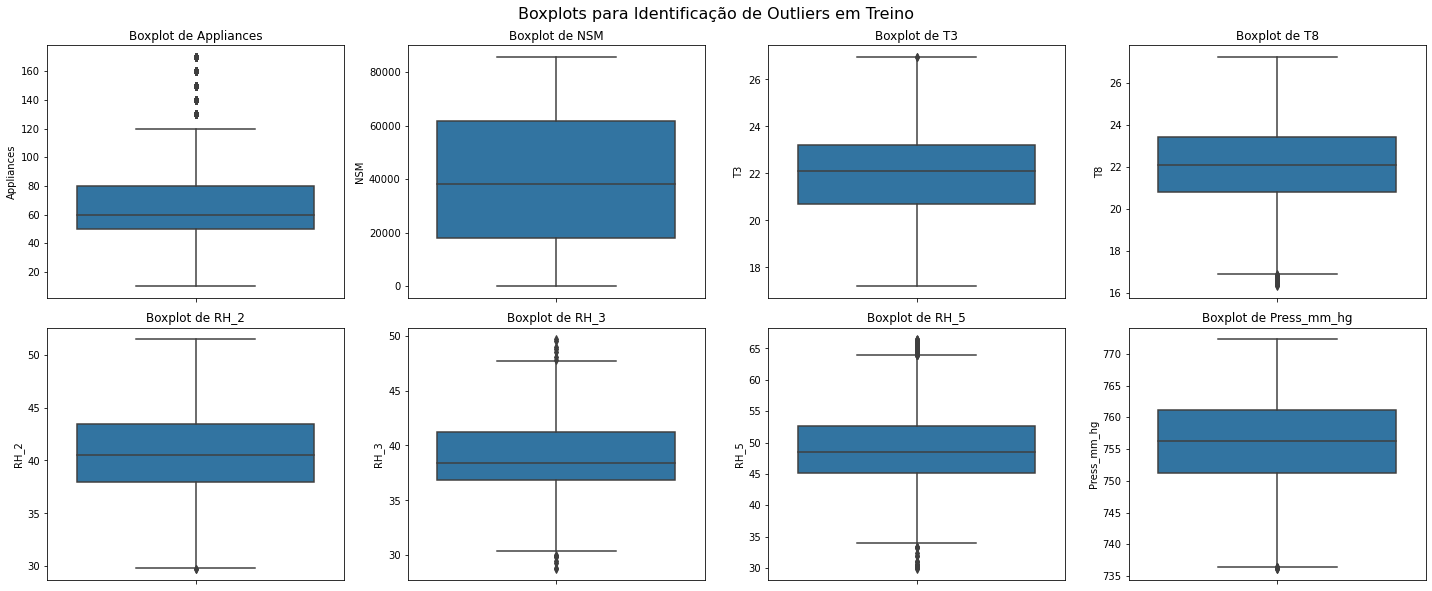

In [15]:
# Boxplots para identificação de outliers em treino após remoção de outliers

# Verificar colunas
print(df_treino2.columns)

# Define o tamanho do gráfico
plt.figure(figsize=(20, 8))

# Loop por todas as colunas do dataframe df_treino2
for i, coluna in enumerate(df_treino2.columns, 1):
    plt.subplot((len(df_treino2.columns) + 3) // 4, 4, i)  # Organiza os subplots para caber até 4 boxplots por linha
    sns.boxplot(y=df_treino2[coluna])  # Adicionar "y=" para evitar confusão
    plt.title(f'Boxplot de {coluna}')
    plt.tight_layout()

plt.suptitle('Boxplots para Identificação de Outliers em Treino', fontsize=16, y=1.02)

plt.show()

In [105]:
# Divisão de variável variáveis preditoras e variável alvo (Appliances, que estou supondo aqui ser a energia gasta em eletrodomésticos)

X_train = df_treino2.copy().drop("Appliances", axis=1)  # Remove a coluna alvo do dataframe para predição
y_train = df_treino2["Appliances"]  # Coluna alvo

X_test = df_teste2.copy().drop("Appliances", axis=1)
y_test = df_teste2["Appliances"]

In [106]:
# Instanciar o modelo
modelo = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=7, random_state=42)

# Treinar o modelo com os dados de treino
modelo.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 11.933
R² Score: 0.615


# Grid Search (Busca Exaustiva) para buscar melhores hiperparâmetros:

In [107]:
# Definir o modelo
modelo = GradientBoostingRegressor(random_state=42)

# Definir os hiperparâmetros a serem testados
parametros = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.03, 0.05, 0.08],
    'max_depth': [5, 6, 7],
    'subsample': [0.7, 1.0],
    'min_samples_split': [2, 5]
}

# Instanciar o GridSearchCV
grid_search = GridSearchCV(estimator=modelo, param_grid=parametros, cv=5, scoring='r2')

# Ajustar o modelo aos dados de treino
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros: ", grid_search.best_params_)

# Melhor modelo
best_model = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")

Melhores parâmetros:  {'learning_rate': 0.03, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 0.7}
Mean Absolute Error (MAE): 13.541
R² Score: 0.516


# Randomized Search (Busca Aleatória) para buscar melhores hiperparâmetros:

In [108]:
# Definir o modelo
modelo = GradientBoostingRegressor(random_state=42)

# Definir a distribuição dos hiperparâmetros a serem testados
parametros = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'min_samples_split': randint(2, 10)
}

# Instanciar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=parametros, n_iter=50, cv=5, scoring='r2', random_state=42)

# Ajustar o modelo aos dados de treino
random_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros: ", random_search.best_params_)

# Melhor modelo
best_model = random_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")


Melhores parâmetros:  {'learning_rate': 0.0430533878126005, 'max_depth': 3, 'min_samples_split': 8, 'n_estimators': 58, 'subsample': 0.908897907718663}
Mean Absolute Error (MAE): 15.112
R² Score: 0.416


# 2ª Tentativa de modelo, com maior número de variáveis

In [109]:
# Seleção de colunas mais relevantes para a regressão de acordo com a seleção de atributos anterior
df_teste3 = df_teste[['Appliances','NSM','T2','T3', 'T6', 'T8', 'RH_1', 'RH_2', 'RH_3', 'RH_5', 'RH_6','RH_7','RH_9','Press_mm_hg','Windspeed','lights']]
df_treino3 = df_treino[['Appliances','NSM','T2','T3', 'T6', 'T8', 'RH_1', 'RH_2', 'RH_3', 'RH_5', 'RH_6','RH_7','RH_9','Press_mm_hg','Windspeed','lights']]

In [110]:
# Divisão de variável variáveis preditoras e variável alvo (Appliances, que estou supondo aqui ser a energia gasta em eletrodomésticos)
X_train = df_treino3.drop("Appliances", axis=1)  # Remove a coluna alvo do dataframe para predição
y_train = df_treino3["Appliances"]  # Coluna alvo

X_test = df_teste3.drop("Appliances", axis=1)
y_test = df_teste3["Appliances"]

In [111]:
# Instanciar o modelo
modelo = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=7, random_state=42)

# Treinar o modelo com os dados de treino
modelo.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 37.421
R² Score: 0.447


# Randomized Search (Busca Aleatória)

In [112]:
# Definir o modelo
modelo = GradientBoostingRegressor(random_state=42)

# Definir a distribuição dos hiperparâmetros a serem testados
parametros = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'min_samples_split': randint(2, 10)
}

# Instanciar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=parametros, n_iter=50, cv=5, scoring='r2', random_state=42)

# Ajustar o modelo aos dados de treino
random_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros: ", random_search.best_params_)

# Melhor modelo
best_model = random_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")

Melhores parâmetros:  {'learning_rate': 0.0430533878126005, 'max_depth': 3, 'min_samples_split': 8, 'n_estimators': 58, 'subsample': 0.908897907718663}
Mean Absolute Error (MAE): 48.516
R² Score: 0.193


# Modelo escolhido:

Verifica-se que não houve grande mudança nos resultados do modelo com mais variáveis preditoras, portanto vou manter o modelo anterior (1ª versão) por ser menos robusto e mais performático, mais especificamente o que apresentou melhores resultados foi também a primeira tentativa de escolha de parâmetros, onde nem o Grid Search nem o Randomized Search melhoraram os resultados:

n_estimators=200, learning_rate=0.05, max_depth=7, random_state=42

Erro Médio Absoluto (EMA): 11,933

R² Score: 0,615